## DATA SCIENCE INTERNSHIP TASK-1

Iris Flower classification ML Project

# 

# LOAD THE DATASET

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.datasets import load_iris


In [2]:
iris=load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

# 

# ANALYZE AND VISUALIZE THE DATASET

In [3]:
df=pd.DataFrame(data=iris.data, columns=['sepal length','sepal width','petal length','petal width'])
df['target']=pd.Series(iris.target)
df['target_names']=pd.Series(iris.target_names)
species = []
for i in range(len(df)):
    if df.iloc[i]['target'] == 0:
        species.append('setosa')
    elif df.iloc[i]['target'] == 1:
        species.append('versicolor')
    elif df.iloc[i]['target'] == 2:
        species.append('virginica')
df['Species'] = species

In [4]:
df

,sepal length,sepal width,petal length,petal width,target,target_names,Species
0,5.1,3.5,1.4,0.2,0,setosa,setosa
1,4.9,3.0,1.4,0.2,0,versicolor,setosa
2,4.7,3.2,1.3,0.2,0,virginica,setosa
3,4.6,3.1,1.5,0.2,0,NaN,setosa
4,5.0,3.6,1.4,0.2,0,NaN,setosa
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,NaN,virginica
146,6.3,2.5,5.0,1.9,2,NaN,virginica
147,6.5,3.0,5.2,2.0,2,NaN,virginica
148,6.2,3.4,5.4,2.3,2,NaN,virginica


Text(0, 0.5, 'Sepal length')

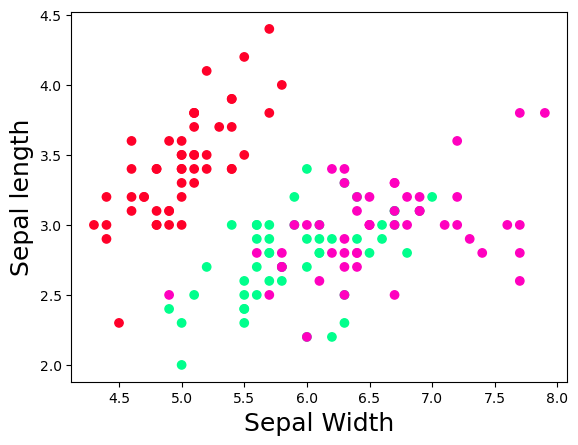

In [5]:
plt.scatter(x=df['sepal length'], y=df['sepal width'] ,c=iris.target, cmap='gist_rainbow') #try using cmap='rainbow'plt.xlabel('Sepal Width', fontsize=18)
plt.xlabel('Sepal Width', fontsize=18)
plt.ylabel('Sepal length', fontsize=18)

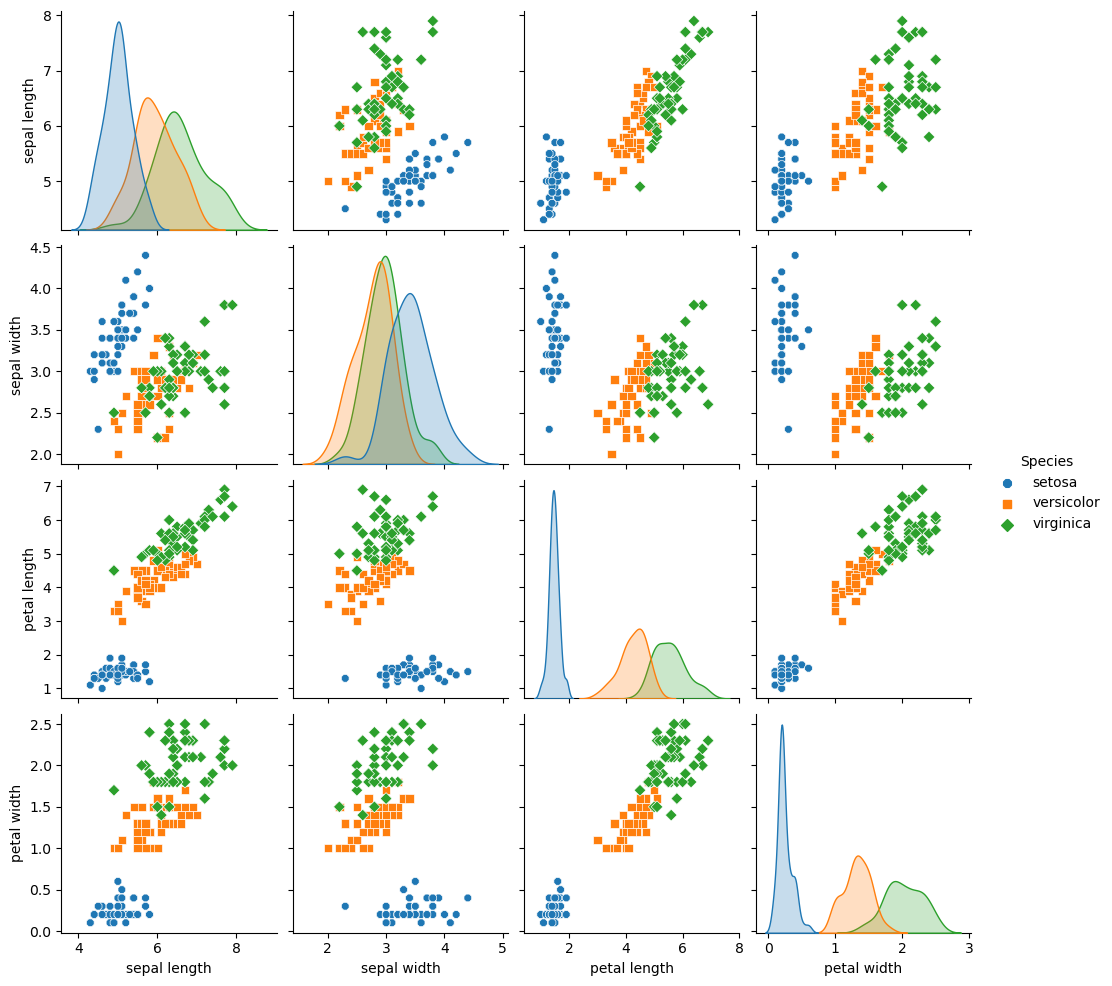

In [6]:
sns.pairplot(df.drop(['target'],axis=1), hue='Species', height=2.5, markers = ["8","s","D"])

# MODEL TRAINING

In [7]:
x=df.iloc[:,:4]
y=df.iloc[:,4]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [8]:
x_train.shape

(112, 4)

In [9]:
x_test.shape

(38, 4)

In [10]:
y_train.shape

(112,)

In [11]:
y_test.shape

(38,)

# MODEL EVALUATION 

In [12]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [13]:
model.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
y_pred=model.predict(x_test)

In [15]:
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [16]:
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_matrix(y_test,y_pred)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

# TESTING THE MODEL

In [17]:
accuracy=accuracy_score(y_test,y_pred)*100
print("Accuracy of the model is {:.2f}".format(accuracy))

Accuracy of the model is 97.37


Conclusion on Classification:

1. Mainly focused on Logistic Regression
2. Used Iris Flowers dataset and performed a logistic regression algorithm
3. Finally, it classified flowers into their species.
4. An accuracy of 97.37%, which shows that the model we built is very accurate.